# Spaceship Titanic

> **Goal**: Predict which passengers are transported to an alternate dimension

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./data/cleaned/clean_train.csv")

In [4]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [5]:
data.shape

(6606, 14)

In [6]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
def get_group(id):
    return int(id[:4])

def get_individual_no(id):
    return int(id[5:])

data["PassengerGroup"] = data["PassengerId"].apply(get_group)
data["IndividualNo"] = data["PassengerId"].apply(get_individual_no)

In [8]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,IndividualNo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1


In [9]:
data["Destination"].value_counts()

TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: Destination, dtype: int64

In [10]:
data.corr("spearman").style.background_gradient(cmap="Blues")

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,IndividualNo
CryoSleep,1.000000,-0.090870,-0.082303,-0.521965,-0.534120,-0.519757,-0.554971,-0.534122,0.462803,-0.003325,0.080627
Age,-0.090870,1.000000,0.108511,0.132855,0.206145,0.112964,0.208032,0.183614,-0.081202,-0.000730,-0.130792
VIP,-0.082303,0.108511,1.000000,0.045791,0.124013,0.033229,0.093526,0.104755,-0.042260,0.015023,0.000778
RoomService,-0.521965,0.132855,0.045791,1.000000,0.175702,0.442219,0.253528,0.176385,-0.363412,0.000647,-0.106167
FoodCourt,-0.534120,0.206145,0.124013,0.175702,1.000000,0.184632,0.478645,0.510008,-0.176724,0.010356,-0.041147
ShoppingMall,-0.519757,0.112964,0.033229,0.442219,0.184632,1.000000,0.256929,0.197898,-0.225309,0.009480,-0.112895
Spa,-0.554971,0.208032,0.093526,0.253528,0.478645,0.256929,1.000000,0.434082,-0.370353,-0.001984,-0.060092
VRDeck,-0.534122,0.183614,0.104755,0.176385,0.510008,0.197898,0.434082,1.000000,-0.344015,-0.004765,-0.060524
Transported,0.462803,-0.081202,-0.042260,-0.363412,-0.176724,-0.225309,-0.370353,-0.344015,1.000000,0.023408,0.091925
PassengerGroup,-0.003325,-0.000730,0.015023,0.000647,0.010356,0.009480,-0.001984,-0.004765,0.023408,1.000000,0.001471


- **CryoSleep** has the highest correlation with Tranported

In [11]:
data.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,IndividualNo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1


In [12]:
%matplotlib inline

In [13]:
data["AmountSpent"] = data["Spa"] + data["ShoppingMall"] + data["FoodCourt"] + data["RoomService"] + data["VRDeck"] 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>,
        <AxesSubplot:title={'center':'FoodCourt'}>],
       [<AxesSubplot:title={'center':'ShoppingMall'}>,
        <AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>],
       [<AxesSubplot:title={'center':'PassengerGroup'}>,
        <AxesSubplot:title={'center':'IndividualNo'}>,
        <AxesSubplot:title={'center':'AmountSpent'}>]], dtype=object)

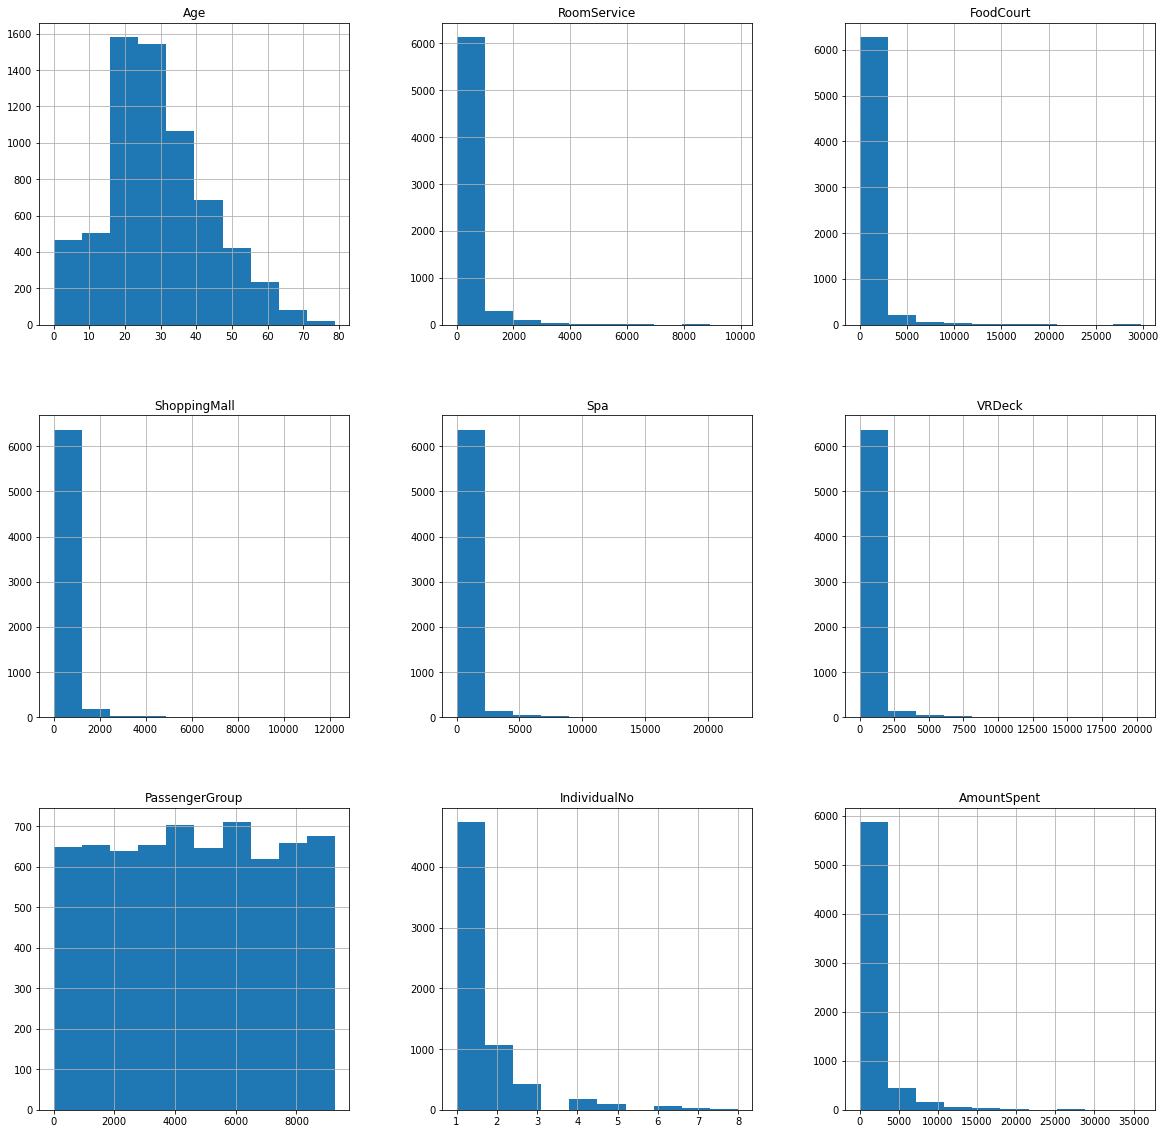

In [14]:
data.hist(figsize=(20, 20))

In [15]:
data["Transported"].sum()

3327

In [16]:
transported = data[data["Transported"] == True]

In [17]:
transported["VIP"].value_counts()

False    3267
True       60
Name: VIP, dtype: int64

In [18]:
not_transported = data[data["Transported"] != True]

In [19]:
transported["RoomService"].describe()

count    3327.000000
mean       64.658852
std       282.632489
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3992.000000
Name: RoomService, dtype: float64

In [20]:
not_transported["RoomService"].describe()

count    3279.000000
mean      383.642269
std       840.194088
min         0.000000
25%         0.000000
50%         1.000000
75%       464.500000
max      9920.000000
Name: RoomService, dtype: float64

- Considering the mean for both, not_transported has a higher mean for roomservice compare to those transported.
- Probably, staying more in their rooms could be a factor

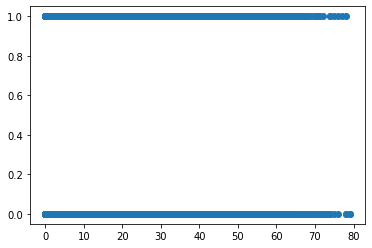

In [21]:
plt.scatter(data["Age"], data["Transported"])

- Age doesn't really have an effect. seems balanced

In [22]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'PassengerGroup', 'IndividualNo', 'AmountSpent'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>,
        <AxesSubplot:title={'center':'FoodCourt'}>],
       [<AxesSubplot:title={'center':'ShoppingMall'}>,
        <AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>],
       [<AxesSubplot:title={'center':'PassengerGroup'}>,
        <AxesSubplot:title={'center':'IndividualNo'}>,
        <AxesSubplot:title={'center':'AmountSpent'}>]], dtype=object)

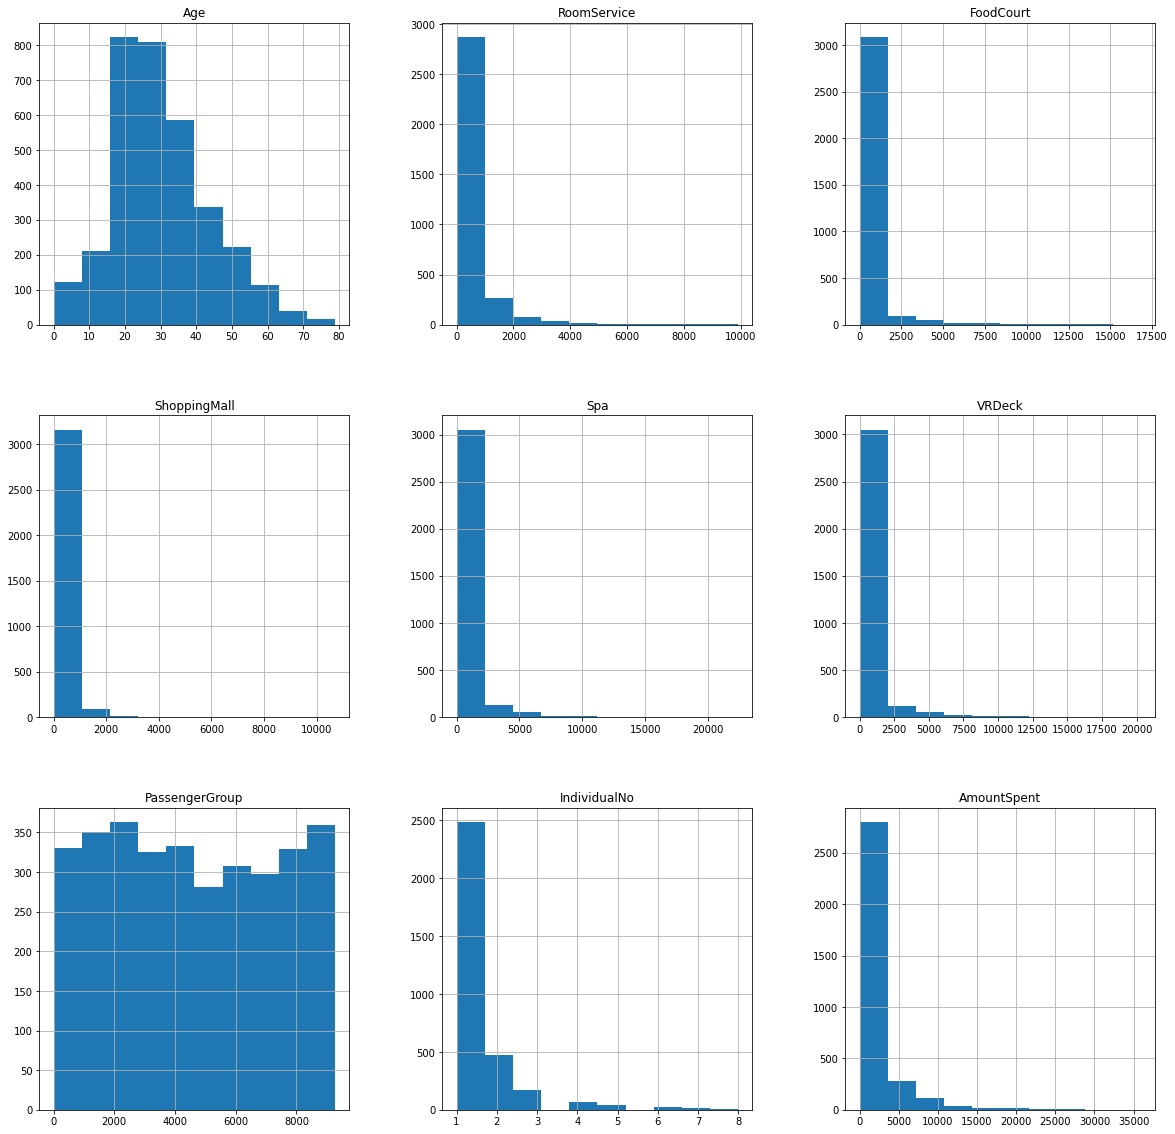

In [23]:
not_transported.hist(figsize=(20, 20))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>,
        <AxesSubplot:title={'center':'FoodCourt'}>],
       [<AxesSubplot:title={'center':'ShoppingMall'}>,
        <AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>],
       [<AxesSubplot:title={'center':'PassengerGroup'}>,
        <AxesSubplot:title={'center':'IndividualNo'}>,
        <AxesSubplot:title={'center':'AmountSpent'}>]], dtype=object)

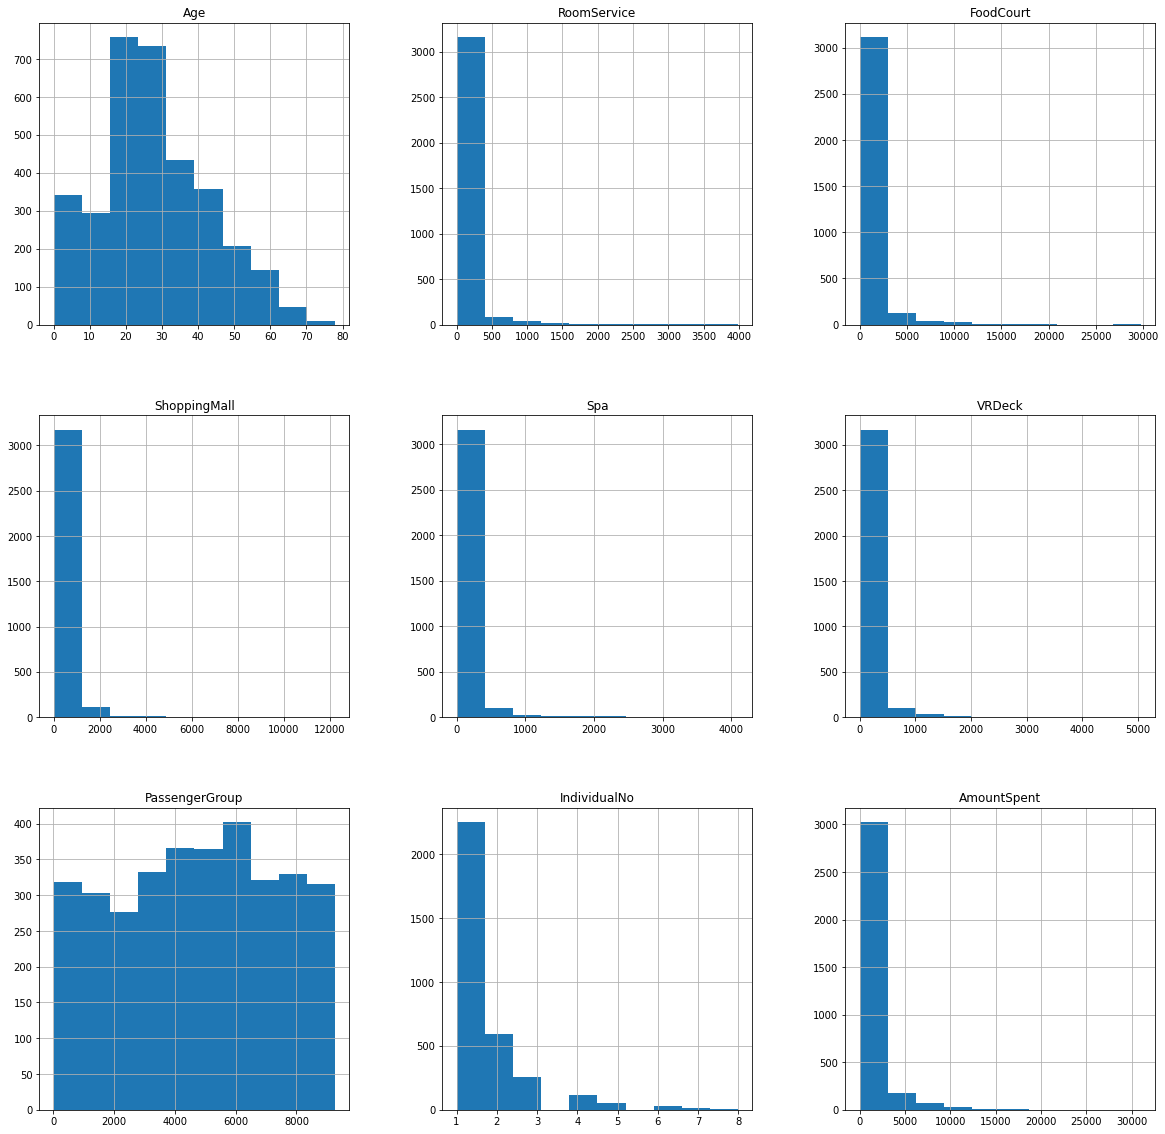

In [24]:
transported.hist(figsize=(20, 20))

In [25]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'PassengerGroup', 'IndividualNo', 'AmountSpent'],
      dtype='object')

(array([2136.,    0.,    0.,    0.,    0.,  315.,    0.,    0.,    0.,
         876.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

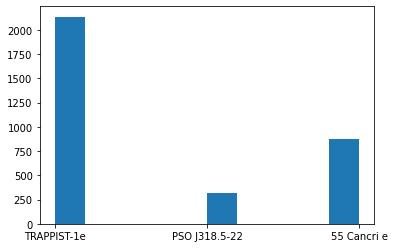

In [26]:
plt.hist(transported["Destination"])

(array([2440.,    0.,    0.,    0.,    0.,  531.,    0.,    0.,    0.,
         308.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

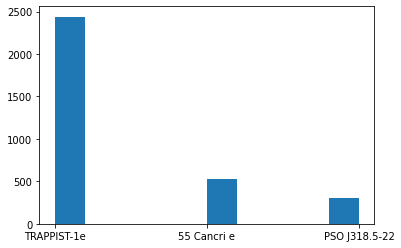

In [27]:
plt.hist(not_transported["Destination"])

(array([1518.,    0.,    0.,    0.,    0., 1104.,    0.,    0.,    0.,
         705.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

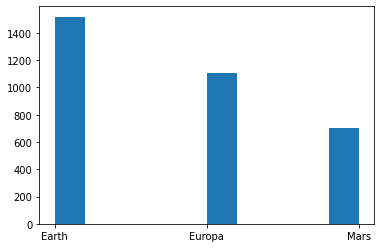

In [28]:
plt.hist(transported["HomePlanet"])

(array([ 569.,    0.,    0.,    0.,    0., 2048.,    0.,    0.,    0.,
         662.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

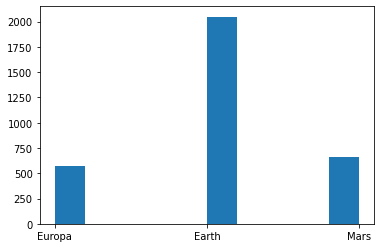

In [29]:
plt.hist(not_transported["HomePlanet"])

In [30]:
len((set(not_transported["Cabin"].unique())).intersection(set(transported["Cabin"].unique())))

433

In [31]:
len((set(transported["Cabin"].unique())))

2737

In [32]:
len((set(not_transported["Cabin"].unique())))

3001

- Out of the Huge number of Cabins that each had, only 433 actually intersect. Means we can also be able to check if someone was transported or not based on the particular cabin he/she was placed in

## **Preprocessing and Model Training**

In [33]:
important_features = ["CryoSleep", "VIP", "RoomService", "PassengerGroup", "Destination", "HomePlanet", "Cabin"]

In [34]:
from sklearn.preprocessing import OrdinalEncoder

y_encoder = OrdinalEncoder()

X_initial = data[important_features]
y = pd.DataFrame(y_encoder.fit_transform(pd.DataFrame(data["Transported"])))
y = np.array(y).reshape(np.size(y))

In [35]:
X_initial.head()

,CryoSleep,VIP,RoomService,PassengerGroup,Destination,HomePlanet,Cabin
0,False,False,0.0,1,TRAPPIST-1e,Europa,B/0/P
1,False,False,109.0,2,TRAPPIST-1e,Earth,F/0/S
2,False,True,43.0,3,TRAPPIST-1e,Europa,A/0/S
3,False,False,0.0,3,TRAPPIST-1e,Europa,A/0/S
4,False,False,303.0,4,TRAPPIST-1e,Earth,F/1/S


We can use some features of sklearn to encode some of the categorical data items

In [36]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

column_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), ["CryoSleep", "VIP", "Destination", "HomePlanet"]),
    (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=6_000), ["Cabin"]),
    remainder="passthrough",
)

In [37]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


model = Pipeline([
    ("transformer", column_transformer),
    ("logistic_regression", SVC(kernel="linear")),
])

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_initial, y, test_size=0.2)

In [39]:
model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CryoSleep', 'VIP',
                                                   'Destination',
                                                   'HomePlanet']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=6000),
                                                  ['Cabin'])])),
                ('logistic_regression', SVC(kernel='linear'))])

In [40]:
model.score(X_test, y_test)

0.7231467473524962

In [41]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score

def some_metrics(model):
    y_pred = model.predict(X_test)

    print("precision_score", precision_score(y_test, y_pred))
    print("recall_score", recall_score(y_test, y_pred))
    print("accuracy_score", accuracy_score(y_test, y_pred))
    print("CrossVal", cross_val_score(model, X_initial, y, cv=3))

    print()

    y_proba = model.predict_proba(X_test)


    def return_y_pred(y_proba):
        return np.array(y_proba[:, 1] > 0.70).astype(np.float16)

    y_pred = return_y_pred(y_proba)

    print("precision_score", precision_score(y_test, y_pred))
    print("recall_score", recall_score(y_test, y_pred))
    print("accuracy_score", accuracy_score(y_test, y_pred))

In [42]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, [{"logistic_regression__C":[0.1, 0.2, 0.4, 0.6, 0.8, 0.7, 1]}], cv=5)

In [ ]:
grid_search.fit(X_initial, y)

In [ ]:
grid_search.best_params_

In [ ]:
some_metrics(grid_search)

In [ ]:
?LogisticRegression